# MOWNiT - Laboratorium 01
## Autor: Jacek Nitychoruk

### Zadanie 1


In [41]:
b = bitstring(Float16(1/3));
println("Float16: ", b[1],"\t", b[2:6],"\t\t", b[7:16]);
b = bitstring(Float32(1/3));
println("Float32: ", b[1],"\t", b[2:9],"\t", b[10:32]);
b = bitstring(Float64(1/3));
println("Float64: ", b[1],"\t", b[2:12],"\t", b[13:64]);
b = bitstring(convert(Float64, Float16(1/3)));
print("Float16->64: ", b[1],"\t", b[2:12],"\t", b[13:64]);

Float16: 0	01101		0101010101
Float32: 0	01111101	01010101010101010101011
Float64: 0	01111111101	0101010101010101010101010101010101010101010101010101
Float16->64: 0	01111111101	0101010101000000000000000000000000000000000000000000

Jak można zauważyć, po rzutowaniu nadmiarowa część mantysy jest wypełniana zerami.

### Zadanie 2

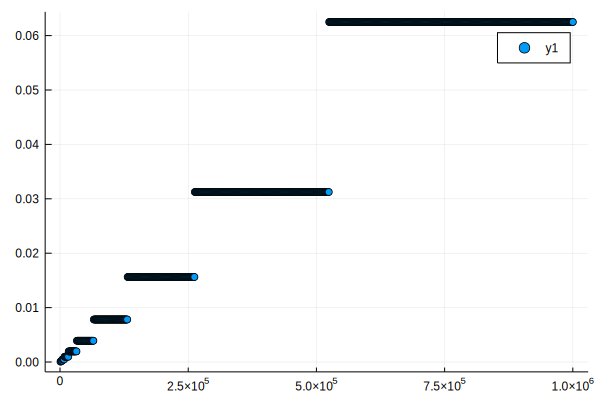

In [2]:
x = Float32[]
y = Float32[]
r = 1:1000
for i = r
    tmp = Float32(i*1000)
    push!(x,i*1000)
    push!(y,nextfloat(tmp)-tmp)
end

using Plots
scatter(x,y)

Można zauważyć, że odległość między kolejnymi liczbami rośnie w przybliżeniu liniowo (dla dwukrotnego zwiększenia się liczby, rośnie dwukrotnie). *Przeskoki* pomiędzy kolejnymi wartościami występują dla liczb będących kolejnymi potęgami liczby 2. 

Poniżej również wykres ciągły dla liczb w zakresie od 1 do 1000:

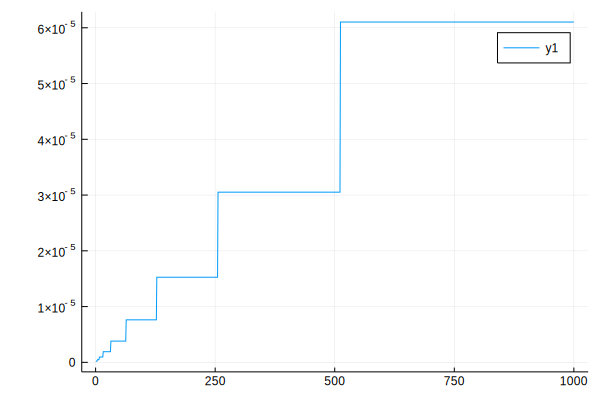

In [3]:
x = Float32[]
y = Float32[]
r = 1:1000
for i = r
    tmp = Float32(i)
    push!(x,i)
    push!(y,nextfloat(tmp)-tmp)
end

using Plots
plot(x,y)

### Zadanie 3

#### Kod w języku `C`

In [ ]:
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <math.h>

int main() {
    float f = 1.0;
    double d = 1.0;

    for (int i = 0; i < 160; ++i) {
        f /= 2;
        printf("(1/2)^%d: ", i+1);
        gsl_ieee_printf_float(&f);
        printf("\n");
    }

    for (int i = 0; i < 1100; ++i) {
        d /= 2;
        printf("(1/2)^%d: ", i+1);
        gsl_ieee_printf_double(&d);
        printf("\n");
    }

    return 0;
}

#### Output - Float:

In [ ]:
(1/2)^1:  1.00000000000000000000000*2^-1
(1/2)^2:  1.00000000000000000000000*2^-2
(1/2)^3:  1.00000000000000000000000*2^-3
...
(1/2)^124:  1.00000000000000000000000*2^-124
(1/2)^125:  1.00000000000000000000000*2^-125
(1/2)^126:  1.00000000000000000000000*2^-126
(1/2)^127:  0.10000000000000000000000*2^-126
(1/2)^128:  0.01000000000000000000000*2^-126
(1/2)^129:  0.00100000000000000000000*2^-126
(1/2)^130:  0.00010000000000000000000*2^-126
(1/2)^131:  0.00001000000000000000000*2^-126
(1/2)^132:  0.00000100000000000000000*2^-126
(1/2)^133:  0.00000010000000000000000*2^-126
(1/2)^134:  0.00000001000000000000000*2^-126
(1/2)^135:  0.00000000100000000000000*2^-126
(1/2)^136:  0.00000000010000000000000*2^-126
(1/2)^137:  0.00000000001000000000000*2^-126
(1/2)^138:  0.00000000000100000000000*2^-126
(1/2)^139:  0.00000000000010000000000*2^-126
(1/2)^140:  0.00000000000001000000000*2^-126
(1/2)^141:  0.00000000000000100000000*2^-126
(1/2)^142:  0.00000000000000010000000*2^-126
(1/2)^143:  0.00000000000000001000000*2^-126
(1/2)^144:  0.00000000000000000100000*2^-126
(1/2)^145:  0.00000000000000000010000*2^-126
(1/2)^146:  0.00000000000000000001000*2^-126
(1/2)^147:  0.00000000000000000000100*2^-126
(1/2)^148:  0.00000000000000000000010*2^-126
(1/2)^149:  0.00000000000000000000001*2^-126
(1/2)^150:  0
(1/2)^151:  0

**Output - Double**

Manstysa dla Float'a przestaje być znormalizowana przy $2^{-127}$, a dla Double'a przy $2^{-1023}$. Brakuje wtedy bitów na przechowywanie cechy, więc aby przechowywać mniejsze liczby konieczne jest zmniejszenie mantysy, czego skutkiem jest utrata dokładności.

In [ ]:
(1/2)^1:  1.0000000000000000000000000000000000000000000000000000*2^-1
(1/2)^2:  1.0000000000000000000000000000000000000000000000000000*2^-2
(1/2)^3:  1.0000000000000000000000000000000000000000000000000000*2^-3
... 
(1/2)^1021:  1.0000000000000000000000000000000000000000000000000000*2^-1021
(1/2)^1022:  1.0000000000000000000000000000000000000000000000000000*2^-1022
(1/2)^1023:  0.1000000000000000000000000000000000000000000000000000*2^-1022
(1/2)^1024:  0.0100000000000000000000000000000000000000000000000000*2^-1022
(1/2)^1025:  0.0010000000000000000000000000000000000000000000000000*2^-1022
(1/2)^1026:  0.0001000000000000000000000000000000000000000000000000*2^-1022
(1/2)^1027:  0.0000100000000000000000000000000000000000000000000000*2^-1022
(1/2)^1028:  0.0000010000000000000000000000000000000000000000000000*2^-1022
(1/2)^1029:  0.0000001000000000000000000000000000000000000000000000*2^-1022
(1/2)^1030:  0.0000000100000000000000000000000000000000000000000000*2^-1022
(1/2)^1031:  0.0000000010000000000000000000000000000000000000000000*2^-1022
...
(1/2)^1070:  0.0000000000000000000000000000000000000000000000010000*2^-1022
(1/2)^1071:  0.0000000000000000000000000000000000000000000000001000*2^-1022
(1/2)^1072:  0.0000000000000000000000000000000000000000000000000100*2^-1022
(1/2)^1073:  0.0000000000000000000000000000000000000000000000000010*2^-1022
(1/2)^1074:  0.0000000000000000000000000000000000000000000000000001*2^-1022
(1/2)^1075:  0
(1/2)^1076:  0

### Zadanie 4 - Stabilność numeryczna

Niech $f(x) = sinh(x) = \frac12\left(e^x-e^{-x}\right)$. Chcąc obliczyć $f(x)$ dla małych $x$ - niewiele większych od $0$ - rzędu $2^{-40}$, otrzymujemy:

In [76]:
unstable = Vector()
for i = 40:60
    x = (1/2)^i
    res = 0.5*(exp(x)-exp(-x))
    println("(1/2)^", i , ":\t" , res)
    push!(unstable, res)
end

(1/2)^40:	9.094947017729282e-13
(1/2)^41:	4.547473508864641e-13
(1/2)^42:	2.2737367544323206e-13
(1/2)^43:	1.1368683772161603e-13
(1/2)^44:	5.684341886080802e-14
(1/2)^45:	2.842170943040401e-14
(1/2)^46:	1.4210854715202004e-14
(1/2)^47:	7.105427357601002e-15
(1/2)^48:	3.552713678800501e-15
(1/2)^49:	1.7763568394002505e-15
(1/2)^50:	8.881784197001252e-16
(1/2)^51:	4.440892098500626e-16
(1/2)^52:	2.220446049250313e-16
(1/2)^53:	5.551115123125783e-17
(1/2)^54:	0.0
(1/2)^55:	0.0
(1/2)^56:	0.0
(1/2)^57:	0.0
(1/2)^58:	0.0
(1/2)^59:	0.0
(1/2)^60:	0.0


#### Komentarz
Jak widać, przy liczbach rzędu $2^{-54}$ obliczenia zwracają zero. Przyczyną jest *cancellation*. Odejmowane są od siebie tak małe liczby, że tracona jest dokładność wyniku i efekcie obliczenia są niepoprawne.  

#### Rozwiązanie
Rozwiązaniem jest zamiana wzoru $f(x)$ na sumę przy pomocy szeregu Taylora. Można wykazać, że:
$$sinh(x)= x + \frac{x^3}{3!} + \frac{x^5}{5!} + \dots = \sum_{i=1}^\infty \frac{x^{2i-1}}{(2i-1)!} $$

In [75]:
stable = Vector()
for i = 40:60
    x = (1/2)^i
    res = 0
    for j = 1:10
        res = res + x^(2*j-1)/factorial(2*j-1)
    end
    println("f((1/2)^", i , "):\t" , res)
    push!(stable, res)
end
println("...")

x = (1/2)^1000
res = 0
for j = 1:10
    res = res + x^(2*j-1)/factorial(2*j-1)
end
println("f((1/2)^", "1000" , "):\t" , res, "\t Prawidłowa (", sinh(2^(-1000)), ")")

f((1/2)^40):	9.094947017729282e-13
f((1/2)^41):	4.547473508864641e-13
f((1/2)^42):	2.2737367544323206e-13
f((1/2)^43):	1.1368683772161603e-13
f((1/2)^44):	5.684341886080802e-14
f((1/2)^45):	2.842170943040401e-14
f((1/2)^46):	1.4210854715202004e-14
f((1/2)^47):	7.105427357601002e-15
f((1/2)^48):	3.552713678800501e-15
f((1/2)^49):	1.7763568394002505e-15
f((1/2)^50):	8.881784197001252e-16
f((1/2)^51):	4.440892098500626e-16
f((1/2)^52):	2.220446049250313e-16
f((1/2)^53):	1.1102230246251565e-16
f((1/2)^54):	5.551115123125783e-17
f((1/2)^55):	2.7755575615628914e-17
f((1/2)^56):	1.3877787807814457e-17
f((1/2)^57):	6.938893903907228e-18
f((1/2)^58):	3.469446951953614e-18
f((1/2)^59):	1.734723475976807e-18
f((1/2)^60):	8.673617379884035e-19
...
f((1/2)^1000):	9.332636185032189e-302	 Prawidłowa (9.332636185032189e-302)


Efekt jest zadowalający - w otrzymanych wynikach nie zachodzi utrata dokładności i są poprawne są nawet dla ekstremalnie małych liczb rzędu $2^{-1000}$.

#### Porównanie rezultatów:
Poniżej porównanie wartości prawidłowych z algorytmem stabilnym i niestabilnym:

In [74]:
println("\t\tPrawidłowa: \t\t Stabliny: \t\t Niestabilny:")
for i = 40:60
    println("f((1/2)^", i , "): \t",sinh((0.5)^i), "\t", stable[i-39], "\t" , unstable[i-39], )
end

		Prawidłowa: 		 Stabliny: 		 Niestabilny:
f((1/2)^40): 	9.094947017729282e-13	9.094947017729282e-13	9.094947017729282e-13
f((1/2)^41): 	4.547473508864641e-13	4.547473508864641e-13	4.547473508864641e-13
f((1/2)^42): 	2.2737367544323206e-13	2.2737367544323206e-13	2.2737367544323206e-13
f((1/2)^43): 	1.1368683772161603e-13	1.1368683772161603e-13	1.1368683772161603e-13
f((1/2)^44): 	5.684341886080802e-14	5.684341886080802e-14	5.684341886080802e-14
f((1/2)^45): 	2.842170943040401e-14	2.842170943040401e-14	2.842170943040401e-14
f((1/2)^46): 	1.4210854715202004e-14	1.4210854715202004e-14	1.4210854715202004e-14
f((1/2)^47): 	7.105427357601002e-15	7.105427357601002e-15	7.105427357601002e-15
f((1/2)^48): 	3.552713678800501e-15	3.552713678800501e-15	3.552713678800501e-15
f((1/2)^49): 	1.7763568394002505e-15	1.7763568394002505e-15	1.7763568394002505e-15
f((1/2)^50): 	8.881784197001252e-16	8.881784197001252e-16	8.881784197001252e-16
f((1/2)^51): 	4.440892098500626e-16	4.440892098500626e-16	4.44089